# Homework 6
### MODELADO DE DATOS CON REDES NEURONALES 
*Professor:* Michal Hemmerling \
*e-mail:* michal.hemmerling@udea.edu.co 

*Student:* Camilo José Torres Castaño \
*e-mail:* cjose.torres@udea.edu.co \
*C.c.* 1036401258


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plts
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf

2022-02-24 18:44:26.846775: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/user/Products/root/lib
2022-02-24 18:44:26.846801: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
!ls

homework6.ipynb  mnist_test.csv


In [3]:
# Upload my data set
dataset = pd.read_csv('mnist_test.csv', sep = ',')
dataset = dataset.to_numpy()

In [33]:
# Divide my data into X data and y data
X_data = dataset[:,1:]
y_data = dataset[:,0]
y_data

array([7, 2, 1, ..., 4, 5, 6])

### Scale the data with the sklearn.preprocessing.StandardScaler

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # Scale
X_data = scaler.fit_transform(X_data) 

In [6]:
# Split my data into test and train samples
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X_data, y_data, test_size=0.1)

In [7]:
print("train data shape: ", X_train.shape)
print("test data shape:  ", X_test.shape)

train data shape:  (9000, 784)
test data shape:   (1000, 784)


In [8]:
# input_shape 

print("Shape of a single sample: ", X_train[0].shape)

Shape of a single sample:  (784,)


In [9]:
# Import a sequential model
from tensorflow.keras.models import Sequential

# Import the models to solve the problems
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Dropout

# Import regularizers
from tensorflow.keras import regularizers

In [10]:
# Setting a fixed seed
tf.random.set_seed(1234)

In [11]:
# Create a function with the Sequential model
def get_model(input_shape, units=100, activation_hidden_layer='relu', activation_output_layer='softmax', drate=0.3, wd=0.01):
    model = Sequential([
                        InputLayer(input_shape = input_shape),
                        #Flatten(),
                        Dense(units=units, activation = activation_hidden_layer, kernel_regularizer = regularizers.l2(wd), name='layer_1'),
                        Dropout(drate),
                        Dense(units=units, activation = activation_hidden_layer, kernel_regularizer = regularizers.l2(wd), name='layer_2'),
                        Dropout(drate),
                        Dense(units=units, activation = activation_hidden_layer, kernel_regularizer = regularizers.l2(wd), name='layer_3'),
                        Dropout(drate),
                        Dense(units=units, activation = activation_hidden_layer, kernel_regularizer = regularizers.l2(wd), name='layer_4'),
                        
                        Dense(units=10, activation = activation_output_layer, name='output_layer') # The units in the output layer must be the number of posibilities they_data can take into account
                        ])
    return model

In [12]:
# Intance a Sequential model
model = get_model(X_train[0].shape, 100, 'relu','softmax',0.3,0.01)

2022-02-24 18:44:29.685508: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/user/Products/root/lib
2022-02-24 18:44:29.685539: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-24 18:44:29.685561: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (user-Lenovo-ideapad-330S-14IKB): /proc/driver/nvidia/version does not exist
2022-02-24 18:44:29.685844: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Summary

In [13]:
# Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 layer_2 (Dense)             (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 layer_3 (Dense)             (None, 100)               10100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 layer_4 (Dense)             (None, 100)               1

## Compile the model

In [14]:
def compile_model(model, optimizer):
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy', # For clasification problem with digits, not with one-hot encoding
                  metrics=['accuracy']
                 )

In [15]:
compile_model(model,'adam')

## Fit the model

In [16]:
epochs = 20
myhistory = model.fit(X_train, y_train, epochs=epochs, batch_size = 32, validation_split=0.15)

Epoch 1/20
240/240 [==============================] - 1s 4ms/step - loss: 3.6890 - accuracy: 0.6753 - val_loss: 2.0194 - val_accuracy: 0.8889
Epoch 2/20
240/240 [==============================] - 1s 3ms/step - loss: 1.6595 - accuracy: 0.8685 - val_loss: 1.2053 - val_accuracy: 0.8985
Epoch 3/20
240/240 [==============================] - 1s 3ms/step - loss: 1.1413 - accuracy: 0.8833 - val_loss: 0.9319 - val_accuracy: 0.9067
Epoch 4/20
240/240 [==============================] - 1s 3ms/step - loss: 0.9116 - accuracy: 0.8949 - val_loss: 0.8190 - val_accuracy: 0.9030
Epoch 5/20
240/240 [==============================] - 1s 3ms/step - loss: 0.8128 - accuracy: 0.9018 - val_loss: 0.7368 - val_accuracy: 0.9230
Epoch 6/20
240/240 [==============================] - 1s 3ms/step - loss: 0.7533 - accuracy: 0.9085 - val_loss: 0.7315 - val_accuracy: 0.9193
Epoch 7/20
240/240 [==============================] - 1s 3ms/step - loss: 0.7413 - accuracy: 0.9030 - val_loss: 0.7092 - val_accuracy: 0.9163
Epoch 

In [17]:
myhistory.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

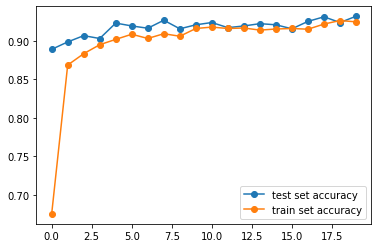

In [18]:
xvals = range(epochs)

fig, ax = plt.subplots(1,1)
ax.plot(xvals, myhistory.history['val_accuracy'], '-o', label='test set accuracy')
ax.plot(xvals, myhistory.history['accuracy'], '-o', label='train set accuracy')
ax.legend()
plt.show()



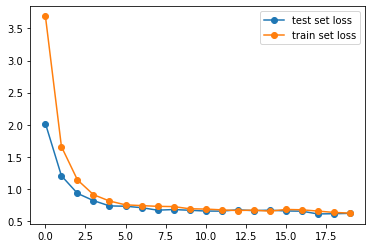

In [19]:
fig, ax = plt.subplots(1,1)

ax.plot(xvals, myhistory.history['val_loss'], '-o', label='test set loss')
ax.plot(xvals, myhistory.history['loss'], '-o', label='train set loss')
ax.legend()
plt.show()




## Evaluate the model

In [20]:
loss, accuracy = model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 0.5751 - accuracy: 0.9420


In [30]:
print("Model accuracy = ", accuracy)

Model accuracy =  0.9419999718666077


## Compare with untrained model

In [22]:
untrained_model = get_model(X_train[0].shape)
compile_model(untrained_model,'adam')

loss_untrained, accuracy_untrained = untrained_model.evaluate(X_train, y_train)

282/282 [==============================] - 1s 2ms/step - loss: 7.1464 - accuracy: 0.0861


In [23]:
print(accuracy_untrained)

0.08611111342906952


## Predict

In [24]:
# We need the same dimension of X_train to predict a sample
X_train.shape

(9000, 784)

In [25]:
# Same dimension but different number of samples
print(X_test[0:1].shape)

(1, 784)


In [29]:
pred = model.predict(X_test[0:1,:])
pred

array([[2.7563428e-03, 6.6748582e-04, 4.1332960e-02, 8.8073602e-03,
        3.1331247e-03, 1.1123316e-03, 6.4847548e-04, 2.8092891e-03,
        9.1495025e-01, 2.3782350e-02]], dtype=float32)